In [ ]:
Strings
1. 521. longest uncommon subsequence I
2. 387. first unique character in a string
3. 13. roman to integer
4. 459. repeated substring pattern
5. 67. add binary
6. 66. plus one
7. 680. valid palindrome II
8. 3. longest substring without repeating characters
9. 5. longest palindromic substring
10.49. group anagrams 

## <font color='red'>521. longest uncommon subsequence I</font>

521. Longest Uncommon Subsequence I
Given two strings a and b, return the length of the longest uncommon subsequence between a and b. If the longest uncommon subsequence does not exist, return -1.
An uncommon subsequence between two strings is a string that is a subsequence of one but not the other.
A subsequence of a string s is a string that can be obtained after deleting any number of characters from s.

For example, "abc" is a subsequence of "aebdc" because you can delete the underlined characters in "aebdc" to get "abc". Other subsequences of "aebdc" include "aebdc", "aeb", and "" (empty string).

Example 1:
Input: a = "aba", b = "cdc"             Output: 3
Explanation: One longest uncommon subsequence is "aba" because "aba" is a subsequence of "aba" but not "cdc".
Note that "cdc" is also a longest uncommon subsequence.

Example 2:
Input: a = "aaa", b = "bbb"             Output: 3
Explanation: The longest uncommon subsequences are "aaa" and "bbb".

Example 3:
Input: a = "aaa", b = "aaa"             Output: -1
Explanation: Every subsequence of string a is also a subsequence of string b. Similarly, every subsequence of string b is also a subsequence of string a.

方法一：脑筋急转弯
字符串的子序列的长度不会超过该字符串的长度。若子序列的长度等于字符串的长度，那么子序列就是该字符串。

若两字符串不相同，那么我们可以选择较长的字符串作为最长特殊序列，显然它不会是较短的字符串的子序列。特别地，当两字符串长度相同时（但不是同一字符串），我们仍然可以选择其中的一个字符串作为最长特殊序列，它不会是另一个字符串的子序列。

若两字符串相同，那么任一字符串的子序列均会出现在两个字符串中，此时应返回 -1−1。

In [ ]:
# 521. Longest Uncommon Subsequence I
class Solution:
    def findLUSlength(self, a: str, b: str) -> int:
        return max(len(a), len(b)) if a != b else -1    
# Time O(n), Space O(1)

## <font color='red'>387. First Unique Character in a String</font>

387. First Unique Character in a String
Given a string s, find the first non-repeating character in it and return its index. If it does not exist, return -1.

Input: s = "leetcode"               Output: 0
Input: s = "loveleetcode"           Output: 2

In [ ]:
# 387. First Unique Character in a String
class Solution:
    def firstUniqChar(self, s: str) -> int:
        if not s: return -1
        d={}
        
        # build a library counting element occurances
        for char in s:
            d[char] = d.get(char, 0) + 1
        for i in range(len(s)):
            if d[s[i]] == 1:
                return i
        return -1

## <font color='red'>13. Roman to Integer</font>

13. Roman to Integer
Roman numerals are represented by seven different symbols: I, V, X, L, C, D and M.

Symbol       Value
I             1
V             5
X             10
L             50
C             100
D             500
M             1000
For example, 2 is written as II in Roman numeral, just two ones added together. 12 is written as XII, which is simply X + II. The number 27 is written as XXVII, which is XX + V + II.

Roman numerals are usually written largest to smallest from left to right. However, the numeral for four is not IIII. Instead, the number four is written as IV. Because the one is before the five we subtract it making four. The same principle applies to the number nine, which is written as IX. There are six instances where subtraction is used:

I can be placed before V (5) and X (10) to make 4 and 9. 
X can be placed before L (50) and C (100) to make 40 and 90. 
C can be placed before D (500) and M (1000) to make 400 and 900.
Given a roman numeral, convert it to an integer.

Input: s = "MCMXCIV"        Output: 1994
Explanation: M = 1000, CM = 900, XC = 90 and IV = 4.

按照题目的描述，可以总结如下规则：

罗马数字由 I,V,X,L,C,D,M 构成；
当小值在大值的左边，则减小值，如 IV=5-1=4；
当小值在大值的右边，则加小值，如 VI=5+1=6；
由上可知，右值永远为正，因此最后一位必然为正。
一言蔽之，把一个小值放在大值的左边，就是做减法，否则为加法。

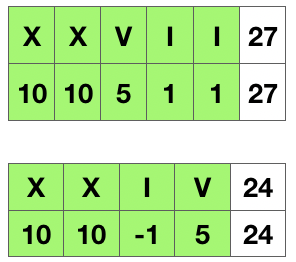
在代码实现上，可以往后看多一位，对比当前位与后一位的大小关系，从而确定当前位是加还是减法。当没有下一位时，做加法即可。

也可保留当前位的值，当遍历到下一位的时，对比保留值与遍历位的大小关系，再确定保留值为加还是减。最后一位做加法即可。


In [ ]:
# 13. Roman to Integer
class Solution:
    def romanToInt(self, s: str) -> int:
        h = {'I':1, 'V':5, 'X':10, 'L':50, 'C':100, 'D':500, 'M':1000}
        res = 0
        
        # char of the string is the key of a hashmap
        # if current char associates with a larger value than next char
        # we add value of current char to res
        # otherwise, we minus that value
        for i in range(len(s) - 1):
            if h[s[i]] >= h[s[i+1]]:
                res += h[s[i]]
            else:
                res -= h[s[i]]
        
        # we need to add value for last char since it does not have a next char to compare to
        res += h[s[-1]]
        return res
# Time O(n), Space O(1)

## <font color='red'>459. Repeated Substring Pattern</font>

459. Repeated Substring Pattern
Given a string s, check if it can be constructed by taking a substring of it and appending multiple copies of the substring together.

Input: s = "abab"           Output: true
Explanation: It is the substring "ab" twice.

Input: s = "aba"
Output: false

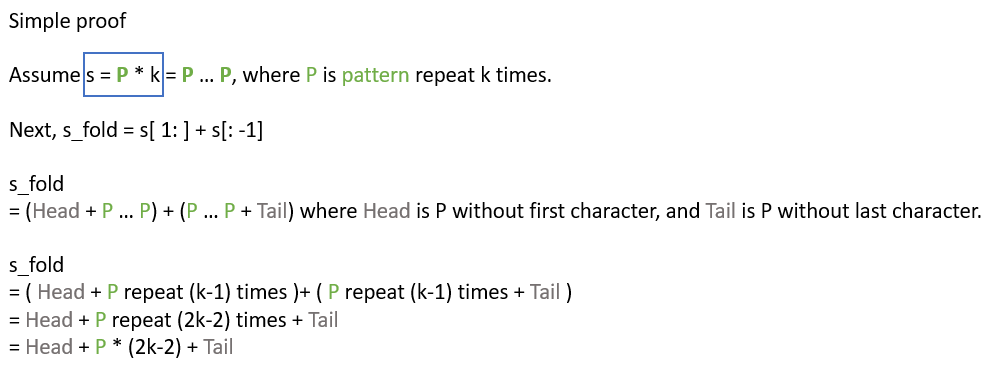
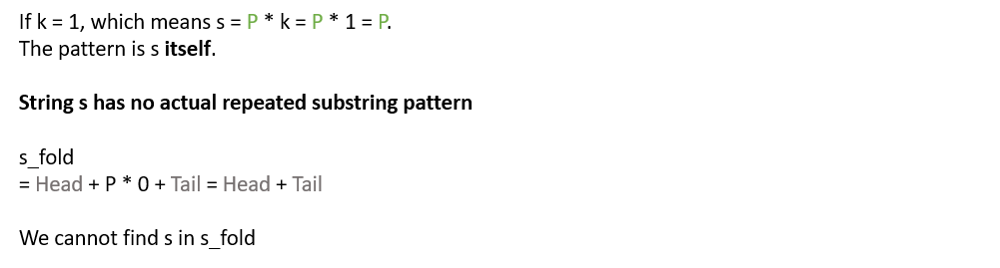
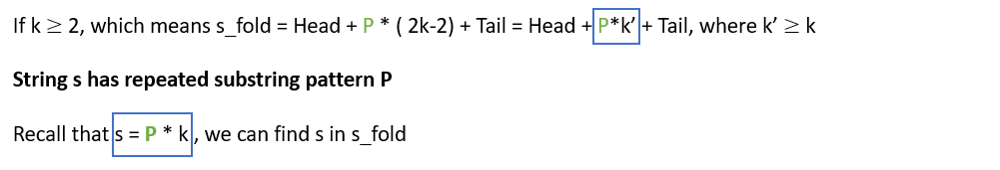

a: Fold, make s_fold = s[ 1 : ] + s[ : -1 ] <br>
b: Check whether we can find s in s_fold or not

In [ ]:
# 459. Repeated Substring Pattern
"""
Let's take the first example provided abab. in this string, we can see that the string can 
be split into ab and ab to satisfy the result. Instead of testing to find the substring that 
makes it valid, when we append two versions, we get abababab, which now has the substring 
abab in it 3 times. The first two, (abab)abab, abab(abab) are not interesting because those 
will be true of every string we feed the algorithm. The third ab(abab)ab is the key here.

Now to see why we remove the first and last chars, lets look at a false result. aba. When 
we duplicate it, we get abaaba which again has (aba)aba and aba(aba) in it, but it does not 
have a third aba in the middle. However return 'aba' in 'abaaba' would return true. By 
removing the first and last char, it becomes return 'aba' in 'baab' which is now false. 
Back to the first example, it becomes return 'abab' in 'bababa' which works because 
of b(abab)a.
"""
class Solution:
    def repeatedSubstringPattern(self, s: str) -> bool:
        return s in s[1:] + s[:-1]
# or return s in (s+s)[1:-1]
# Time O(n^2), Space O(n)

In [ ]:
# 459. Repeated Substring Pattern
class Solution:
    def repeatedSubstringPattern(self, s: str) -> bool:
        pattern = ''
        length_s = len(s)
        
        # "True" means the string is pattern * n (n>=2). 
        # We start "pattern" as an empty string and keep adding char to grow "pattern"
        # at some point, we should reach: s == pattern * n where n=len(s)//len(pattern)
        # we do not need to grow pattern over half of string s
        for i in range(length_s // 2):
            pattern += s[i]
            # note code still works without this first if statement
            # but it should improve the runtime 
            if length_s % len(pattern) == 0:
                if pattern * (length_s // len(pattern)) == s:
                    return True
        return False
# Time O(n^2), Space O(n)

## <font color='red'>67. Add Binary</font>

67. Add Binary
Given two binary strings a and b, return their sum as a binary string.

In [ ]:
# 67. Add Binary
# recursion edition. same as class notebook
class Solution:
        def addBinary(self, a, b):
            if len(a)==0: return b
            if len(b)==0: return a
            if a[-1] == '1' and b[-1] == '1':
                return self.addBinary(self.addBinary(a[0:-1],b[0:-1]),'1')+'0'
            if a[-1] == '0' and b[-1] == '0':
                return self.addBinary(a[0:-1],b[0:-1])+'0'
            else:
                return self.addBinary(a[0:-1],b[0:-1])+'1'

In [ ]:
# 67. Add Binary
class Solution:
    def addBinary(self, a: str, b: str) -> str:
        carry = 0
        res = ''

        a = list(a)
        b = list(b)
        
        # there are only 3 outcomes: 0+0=0, 0+1=1, 1+1=2 (need to chance to 10)
        # so we introduce a "carry" to carry the "1" for the last senario
       
        while a or b or carry:
            if a:
                carry += int(a.pop())
            if b:
                carry += int(b.pop())
            
            # start while loop, carry is either 0, 1, 2 after two if statements
            # carry%2 will be 0, 1, 0 accordingly, convert to str and add to res
            # carry=carry//2 will be 0,0, 1 accordingly. 
            # Only when we have 1+1=2 senario, carry will carry 1 into the next while loop
            res += str(carry %2)
            carry //= 2
        # need reverse the string since we start from the end of both list
        return res[::-1]
# Time O(n), Space O(n)

## <font color='red'>66. Plus One</font>

66. Plus One
You are given a large integer represented as an integer array digits, where each digits[i] is the ith digit of the integer. The digits are ordered from most significant to least significant in left-to-right order. The large integer does not contain any leading 0's.
Increment the large integer by one and return the resulting array of digits. 

Example 1:
Input: digits = [1,2,3]       Output: [1,2,4]
Explanation: The array represents the integer 123.
Incrementing by one gives 123 + 1 = 124. Thus, the result should be [1,2,4].

Example 2:
Input: digits = [4,3,2,1]    Output: [4,3,2,2]
Explanation: The array represents the integer 4321.
Incrementing by one gives 4321 + 1 = 4322.     Thus, the result should be [4,3,2,2].

In [ ]:
# 66. Plus One
class Solution:
    def plusOne(self, digits: List[int]) -> List[int]:
        if not digits: return [1]
        
        # convert list to a string, then convert s to int so we can add 1 to the int
        s = ''.join(str(i) for i in digits)
        num = int(s) + 1
        
        # convert the resulting int back to a output lst
        lst= [int(c) for c in str(num)]
        return lst
# Time O(n), Space O(n)

In [ ]:
# 66. Plus One
def plusOne(digits):
    num = 0
    
    # pow(10, n) will yield 10^n
    for i in range(len(digits)):
        num += digits[i] * pow(10, (len(digits)-1-i))
    return [int(i) for i in str(num+1)]

In [ ]:
# 66. Plus One
# quite clever strategy!!!
class Solution:
    def plusOne(self, digits: List[int]) -> List[int]:
        n = len(digits)
        for i in range(n-1, -1, -1):
            if digits[i] == 9:
                digits[i] = 0
            else:
                digits[i] += 1
                return digits
        digits.insert(0, 1)
        return digits

作者：liupengsay
链接：https://leetcode.cn/problems/plus-one/solution/er-xu-cheng-ming-jiu-xu-zui-by-liupengsa-ucia/
#T：O(N)
#S: O(1)

## <font color='red'>680. Valid Palindrome II</font>

680. Valid Palindrome II
Given a string s, return true if the s can be palindrome after deleting at most one character from it.

Example 1:
Input: s = "aba"         Output: true

Example 2:
Input: s = "abca"        Output: true
Explanation: You could delete the character 'c'.

Example 3:
Input: s = "abc"         Output: false

In [ ]:
# 680. Valid Palindrome II
class Solution:
    def validPalindrome(self, s: str) -> bool:
        # need two pointers for front and tail of the string
        i, j = 0, len(s) - 1
        
        # we can either define this fucntion in a regular way
        # or use lambda since it is short
        is_palindrome = lambda x: x == x[::-1]
        
        # we move both pointers inward simultaneously
        # if we encounter a senario where s[i] != s[j]
        # then we need to check: after we exclude either s[i] or s[j], will the rest of
        # the string is valid palindrom?
        # as slong as one of them is palindrom, we have a True output
        # if none, code stops and we return False
        while i < j:
            if s[i] != s[j]:
                return is_palindrome(s[i:j]) or is_palindrome(s[i + 1:j + 1])
            i += 1
            j -= 1
        return True
# Time O(n), Space O(1)

## <font color='red'>3. Longest Substring Without Repeating Characters</font>

In [ ]:
3. Longest Substring Without Repeating Characters
Given a string s, find the length of the longest substring without repeating characters.
Input: s = "abcabcbb"
Output: 3
Explanation: The answer is "abc", with the length of 3.

In [ ]:
#3. Longest Substring Without Repeating Characters
# classical sliding window problems
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        if not s:return 0
        
        left = 0
        lookup = set()
        max_len = 0
        cur_len = 0
        
        # we star to put elements into the sliding window as long as there is no duplicate
        # when s[i] already in the set "lookup", we need to do two things:
        # 1) first, we need to remove elements from left of the string till there value s[i] is out
        # 2) second, we neeed update the length of the sliding window each step
        # after while loop, we need to update the max_len.
        # then we add element s[i] to the set and repeat adding elements on the right
        for i in range(len(s)):
            cur_len += 1
            while s[i] in lookup:
                lookup.remove(s[left])
                left += 1
                cur_len -= 1
            if cur_len > max_len:
                max_len = cur_len
            lookup.add(s[i])
        return max_len

In [ ]:
#3. Longest Substring Without Repeating Characters
# a little bit shorter code from Lu. update mac length using index positions
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
      
        set_s = set()
        left = 0
        res = 0 
        
        for right in range(len(s)):
            while s[right] in set_s:
                set_s.remove(s[left])
                left += 1
            
            set_s.add(s[right])
            res = max(res, right - left + 1)
        return res
#T: O(N) sliding window 
#S: O(1）

## <font color='red'>5. Longest Palindromic Substring</font>

5. Longest Palindromic Substring
Given a string s, return the longest palindromic substring in s.

A string is called a palindrome string if the reverse of that string is the same as the original string.

Input: s = "babad"      Output: "bab"
Explanation: "aba" is also a valid answer.

Input: s = "cbbd"       Output: "bb"

In [ ]:
From leetcode.
解法2(T87% S70%): 中心扩散，每个位置往左右两边扩散，找到最长的那个
要注意 a aa aaa这种都是对称的，因此初始化right时应用一个while一直把相等的都算做初始的中心串

In [ ]:
# 5. Longest Palindromic Substring
class Solution(object):
    def longestPalindrome(self, s):
        """
        :type s: str
        :rtype: str
        """
        ans = []
        for i in range(len(s)):
            left = i 
            right = i
            # spread if char on the right is the same as s[i]
            while right+1 < len(s) and s[right+1]==s[right]:
                right += 1
                
            # spread if left = right and btoh left and right are inbound
            while left>-1 and right<len(s) and s[left]==s[right]:
                left -= 1
                right += 1
            
            # update the result for each center
            if len(s[left+1:right]) > len(ans):
                ans = s[left+1:right]

        return ans
# 时间复杂度：O(n^2) (n centers, 每个回文中心最多会向外扩展 O(n)次。)

In [ ]:
# 5. Longest Palindromic Substring
# dp copy from Lu
class Solution:
    def longestPalindrome(self, s: str) -> str:
        n = len(s)
        if n < 2:
            return s
        
        max_len = 1
        begin = 0
        # dp[i][j] 表示 s[i..j] 是否是回文串
        dp = [[False] * n for _ in range(n)]
        for i in range(n):
            dp[i][i] = True
        
        # 递推开始
        # 先枚举子串长度
        for L in range(2, n + 1):
            # 枚举左边界，左边界的上限设置可以宽松一些
            for i in range(n):
                # 由 L 和 i 可以确定右边界，即 j - i + 1 = L 得
                j = L + i - 1
                # 如果右边界越界，就可以退出当前循环
                if j >= n:
                    break
                    
                if s[i] != s[j]:
                    dp[i][j] = False 
                else:
                    if j - i < 3:
                        dp[i][j] = True
                    else:
                        dp[i][j] = dp[i + 1][j - 1]
                
                # 只要 dp[i][L] == true 成立，就表示子串 s[i..L] 是回文，此时记录回文长度和起始位置
                if dp[i][j] and j - i + 1 > max_len:
                    max_len = j - i + 1
                    begin = i
        return s[begin:begin + max_len]

作者：LeetCode-Solution
链接：https://leetcode.cn/problems/longest-palindromic-substring/solution/zui-chang-hui-wen-zi-chuan-by-leetcode-solution/
    #这还是个二维dp......

In [ ]:
# 5. Longest Palindromic Substring
# dp from leetcode
class Solution:
    def longestPalindrome(self, s: str) -> str:
        n = len(s)

        # 特解
        if n < 2:
            return s

        '''
        创建动归表dp (n x n的全为False的矩阵) 用来表示字符串s的每一个子串是否为回文
        s子串个数 = n + n - 1 + ... + 1, e.g. 字符串babad有5 + 4 + 3 + 2 + 1 = 15种子串
        start用来跟踪最长回文子串的起点, max_len代表最长回文子串的长度
        '''
        dp = [[False] * n for _ in range(n)]
        start, max_len = 0, 1

        '''
        如果字符串是babad
        下面的双循环则进行以下遍历 (遍历所有可能的15个子字符串):
        b
        ba,    a
        bab,   ab,   b,
        baba,  aba,  ba,  a
        babad, abad, bad, ad, d

        dp[left][right]代表s被left和right指针相夹而得的子字符串
        e.g. left = 0, right = 3, dp[left][right] = baba
        '''
        for right in range(n):
            for left in range(0, right + 1):
                '''
                (0) 求子串跨越长度span
                (1) 边缘情况1: 子串长度为1, 则一定是回文
                (2) 边缘情况2: 子串长度为2, 如果俩字符相同则是回文
                (3) 非边缘情况则进行动态规划之状态转移: 如果b是回文, aba也一定是回文
                    即判断是否为回文需同时满足两条件: 
                        1. 剥离左右最外层字符后的子字符串是回文 
                        2. 最外层的字符相同
                '''
                span = right - left + 1
                if span == 1:
                    dp[left][right] = True
                elif span == 2:
                    dp[left][right] = s[left] == s[right]
                else:
                    dp[left][right] = dp[left + 1][right-1] and s[left] == s[right]

                # 若新的回文出现, 判断是否需要更新最大长度
                if dp[left][right]:
                    if span > max_len:
                        max_len = span
                        start = left
        # 返回最长回文子串
        return s[start:start + max_len]

作者：eason734
链接：https://leetcode.cn/problems/longest-palindromic-substring/solution/zui-tong-su-wu-fei-hua-de-pythondong-tai-nysh/
来源：力扣（LeetCode）
著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

## <font color='red'>49. Group Anagrams</font>

49. Group Anagrams
Given an array of strings strs, group the anagrams together. You can return the answer in any order.
An Anagram is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.

Example 1:

Input: strs = ["eat","tea","tan","ate","nat","bat"]
Output: [["bat"],["nat","tan"],["ate","eat","tea"]]

Input: strs = ["a"]
Output: [["a"]]

We recall that anagrams are strings which have identical counts of characters. So anagrams, when sorted, result in the same string. We take advantage of this last property.

We create a dictionary and for each word in the input array, we add a key to the dictionary if the sorted version of the word doesn't already exist in the list of keys. The key then becomes the sorted version of the word, and the value for the key is an array that stores each anagram of the key. i.e. for every next word that is an anagram, we would sort the word, find the key that is equal to the sorted form, and add the original word to the list of values for the key.

At the end of it, we just add every value in the dictionary to the final array.

In [ ]:
# 49. Group Anagrams
class Solution:
    def groupAnagrams(self, strs: List[str]) -> List[List[str]]:
        res = []
        hashmap = {}
        
        # for anagram strings, sorted(str) will return the same list
        # ''.join(sorted(word)) will give same sorted string if anagrams.
        # then we store anagram strings in one list
        
        for word in strs:
            sortedWord = ''.join(sorted(word))
            if sortedWord not in hashmap:
                hashmap[sortedWord] = [word]
            else:
                hashmap[sortedWord].append(word)
      
        for v in h.values():
            final.append(value)
        return final
    
"""
Time complexity: O(m*nlogn))
Space complexity: O(n)
"""

In [ ]:
# 49. Group Anagrams
# copied from Lu
class Solution1:
    def groupAnagrams(self, strs: list[str]) -> list[list[str]]:
         
        ans = defaultdict(list)
        for s in strs:
            count = [0] * 26
            for c in s:
                count[ord(c) - ord('a')] += 1
            print(count)
            ans[tuple(count)].append(s)
        return ans.values()
#T: O(M*N)
#S:O(M*N)